In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.models import Sequential 
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import warnings 
import os 

warnings.filterwarnings('ignore')

In [5]:
#read dataset  --> train, test
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [6]:
#image classes

image_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train')
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [7]:
def plot_image(image_classes):
    plt.figure(figsize = (12, 12))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category 
        images_in_folders = os.listdir(image_path)
        
        first_image = images_in_folders[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

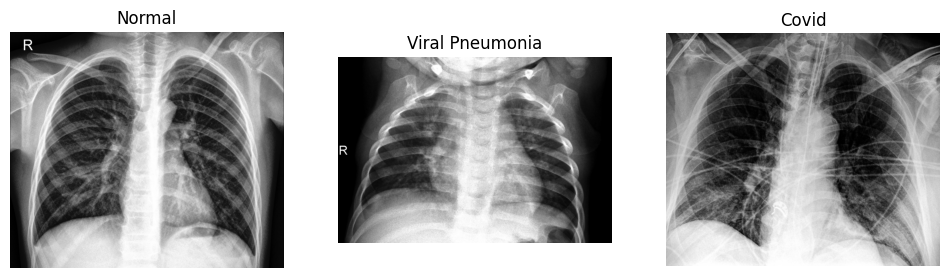

In [8]:
plot_image(image_classes)

In [9]:
# image preprocessing 
# model
data_generator = ImageDataGenerator(rescale = 1/255)

In [10]:
# train data generator 
train_data = data_generator.flow_from_directory(train_path, 
                                               target_size = (224, 224),
                                               batch_size = 16
                                               )

Found 251 images belonging to 3 classes.


In [11]:
# test data generator 
test_data = data_generator.flow_from_directory(test_path,
                                              target_size = (224, 224),
                                              batch_size = 16 
                                              )

Found 66 images belonging to 3 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN Model
model = Sequential()

# First conv layer with input shape specified
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer (input shape is not needed here)
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# Another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))

# Output layer for 3 classes
model.add(Dense(3, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,855,715 (49.04 MB)

 Trainable params: 12,855,715 (49.04 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# compile 
model.compile(optimizer = 'adam', 
             loss = 'categorical_crossentropy',
             metrics = ['accuracy']
             )

In [16]:
# fit model
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = test_data)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 914ms/step - accuracy: 0.4303 - loss: 2.7339 - val_accuracy: 0.6970 - val_loss: 0.6369
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 706ms/step - accuracy: 0.9173 - loss: 0.3186 - val_accuracy: 0.7879 - val_loss: 0.5068
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 727ms/step - accuracy: 0.9360 - loss: 0.1559 - val_accuracy: 0.8182 - val_loss: 0.4727
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 803ms/step - accuracy: 0.9471 - loss: 0.1591 - val_accuracy: 0.8636 - val_loss: 0.3649
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 705ms/step - accuracy: 1.0000 - loss: 0.0489 - val_accuracy: 0.8485 - val_loss: 0.5873


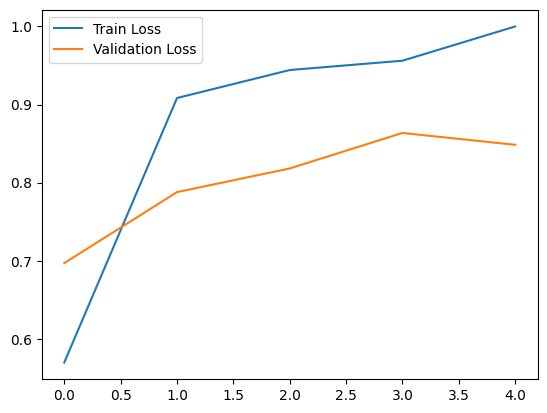

In [17]:
plt.plot(model_history.history['accuracy'], label ='Train Loss')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Loss')
plt.legend()
plt.show()

In [18]:
model.evaluate(test_data)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.8332 - loss: 0.7914


[0.5872645378112793, 0.8484848737716675]

In [19]:
# save model
model.save('covid19_model.h5')

In [20]:
class_map = dict([value, key] for key, value in train_data.class_indices.items())

In [21]:
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [22]:
import numpy as np

In [27]:
# Extract train images and labels
X_train, y_train = [], []
for images, labels in train_data:
    X_train.append(images)
    y_train.append(labels)
    if len(X_train) * train_data.batch_size >= train_data.samples:
        break

X_train = np.vstack(X_train)  # Combine all batches
y_train = np.vstack(y_train)

# Extract test images and labels
X_test, y_test = [], []
for images, labels in test_data:
    X_test.append(images)
    y_test.append(labels)
    if len(X_test) * test_data.batch_size >= test_data.samples:
        break

X_test = np.vstack(X_test)
y_test = np.vstack(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


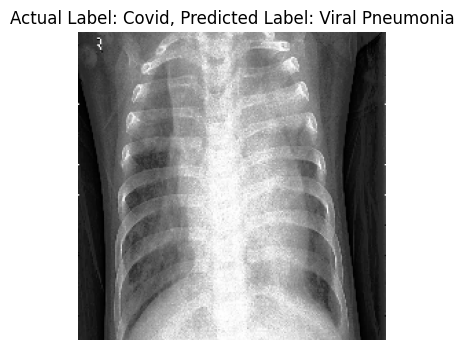

In [28]:
def prediction(test_image, actual_label):
    # Load and preprocess the image
    test_img = image.load_img(test_image, target_size=(224, 224))
    test_img_array = image.img_to_array(test_img) / 255.0

    # Reshape the image for the model
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0], 
                                            test_img_array.shape[1], 
                                            test_img_array.shape[2])

    # Make prediction
    predicted_class = np.argmax(model.predict(test_img_input))
    predicted_label = class_map[predicted_class]  # Make sure class_map is defined with your class labels

    # Display the image with actual and predicted labels
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title('Actual Label: {}, Predicted Label: {}'.format(actual_label, predicted_label))
    plt.grid(False)
    plt.axis('off')
    plt.show()

# Example usage
test_image = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Viral Pneumonia/0112.jpeg'
prediction(test_image, actual_label='Covid')

In [29]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score

In [30]:
# Flatten images for the classifier
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train_flat, y_train.argmax(axis=1))  # Use argmax for class labels

# Predict on test data
y_pred = clf.predict(X_test_flat)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test.argmax(axis=1), y_pred))

Accuracy: 0.7575757575757576


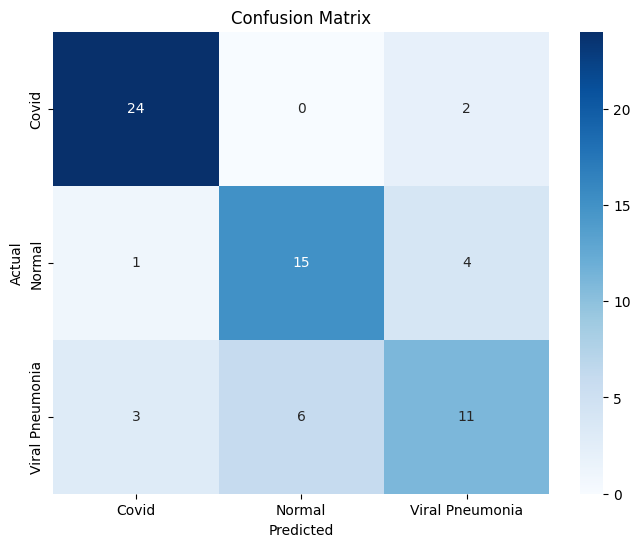

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_data.class_indices.keys(), yticklabels=train_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred, target_names=train_data.class_indices.keys())
print(report)

                 precision    recall  f1-score   support

          Covid       0.86      0.92      0.89        26
         Normal       0.71      0.75      0.73        20
Viral Pneumonia       0.65      0.55      0.59        20

       accuracy                           0.76        66
      macro avg       0.74      0.74      0.74        66
   weighted avg       0.75      0.76      0.75        66



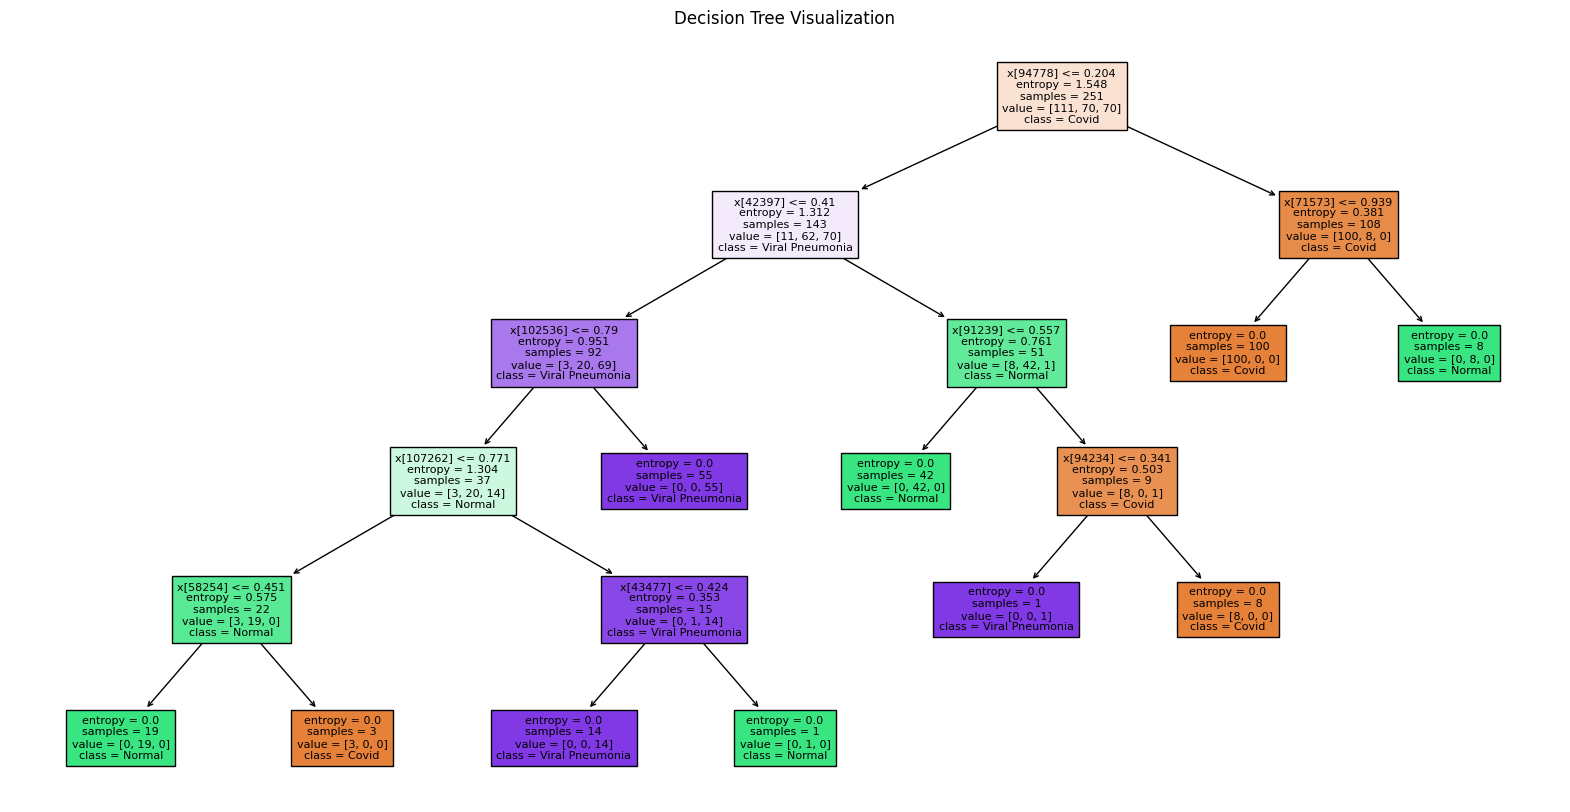

In [35]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=None, class_names=list(train_data.class_indices.keys()), filled=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

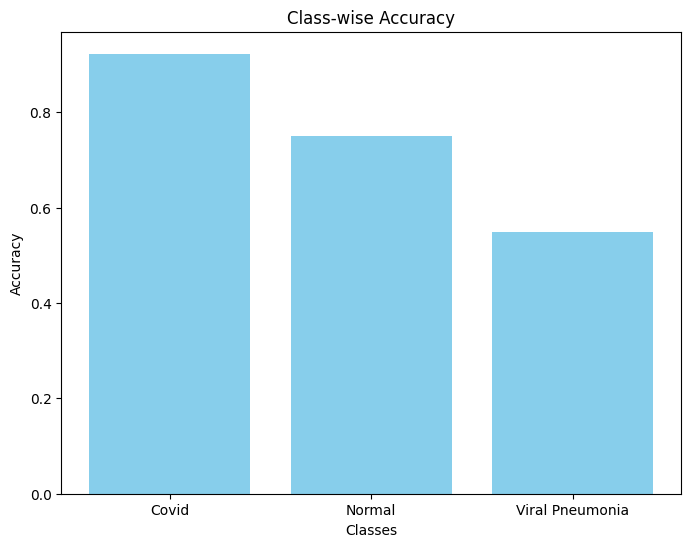

In [36]:
# Accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(train_data.class_indices.keys(), class_accuracy, color='skyblue')
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.title("Class-wise Accuracy")
plt.show()

Silhouette Score: 0.14954325556755066


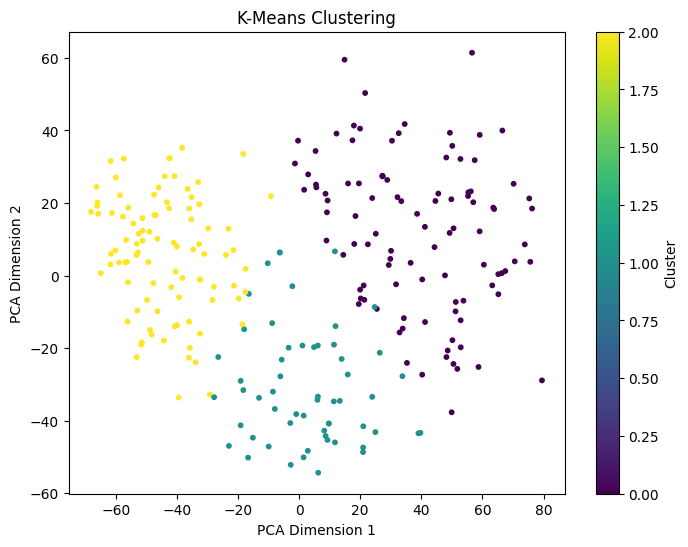

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # 3 clusters for 3 classes
kmeans.fit(X_train_flat)
# Predict cluster labels
cluster_labels = kmeans.predict(X_train_flat)

# Evaluate K-Means using silhouette score
silhouette_avg = silhouette_score(X_train_flat, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters (reduce dimensions using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_train_flat)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.colorbar(label="Cluster")
plt.show()

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Flatten the training and test images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_flat, y_train.argmax(axis=1))  # Use labels for supervised learning

# Predict on test data
y_pred_nb = nb.predict(X_test_flat)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy}")

# Classification report
from sklearn.metrics import classification_report
print("Naive Bayes Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_nb, target_names=train_data.class_indices.keys()))


Naive Bayes Accuracy: 0.7575757575757576
Naive Bayes Classification Report:
                 precision    recall  f1-score   support

          Covid       0.89      0.92      0.91        26
         Normal       0.71      0.60      0.65        20
Viral Pneumonia       0.64      0.70      0.67        20

       accuracy                           0.76        66
      macro avg       0.74      0.74      0.74        66
   weighted avg       0.76      0.76      0.76        66



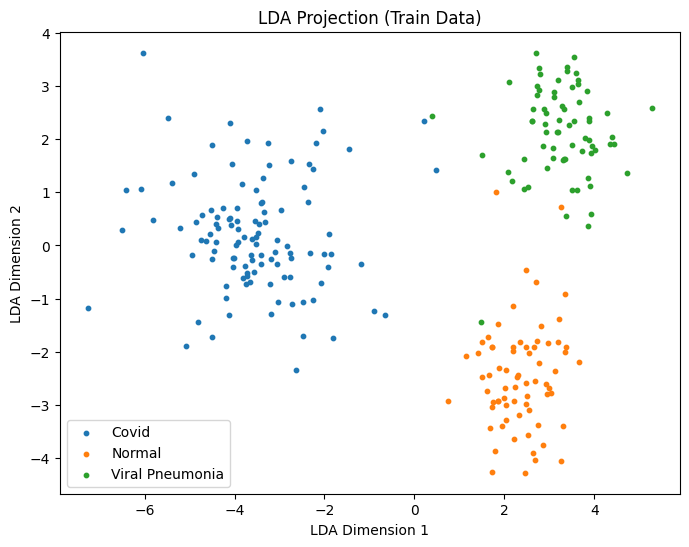

LDA Accuracy: 0.8484848484848485
LDA Classification Report:
                 precision    recall  f1-score   support

          Covid       1.00      0.92      0.96        26
         Normal       0.87      0.65      0.74        20
Viral Pneumonia       0.70      0.95      0.81        20

       accuracy                           0.85        66
      macro avg       0.86      0.84      0.84        66
   weighted avg       0.87      0.85      0.85        66



In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Train LDA model
lda = LDA(n_components=2)  # Reduce to 2 components for visualization
X_train_lda = lda.fit_transform(X_train_flat, y_train.argmax(axis=1))
X_test_lda = lda.transform(X_test_flat)

# Visualize LDA-transformed data
plt.figure(figsize=(8, 6))
for class_label, class_name in enumerate(train_data.class_indices.keys()):
    plt.scatter(X_train_lda[y_train.argmax(axis=1) == class_label, 0],
                X_train_lda[y_train.argmax(axis=1) == class_label, 1],
                label=class_name, s=10)
plt.title("LDA Projection (Train Data)")
plt.xlabel("LDA Dimension 1")
plt.ylabel("LDA Dimension 2")
plt.legend()
plt.show()

# Train LDA for classification
lda_classifier = LDA()
lda_classifier.fit(X_train_flat, y_train.argmax(axis=1))

# Predict using LDA
y_pred_lda = lda_classifier.predict(X_test_flat)

# Evaluate LDA
lda_accuracy = accuracy_score(y_test.argmax(axis=1), y_pred_lda)
print(f"LDA Accuracy: {lda_accuracy}")

# Classification report for LDA
print("LDA Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_lda, target_names=train_data.class_indices.keys()))